We create our data

X: (hours slept, hours studied)
Y: grade on exam

In [335]:
import numpy as np
from numpy.linalg import norm

X = np.array(([3,5],[5,1],[10,2]), dtype=float)
y = np.array(([75],[82],[93]), dtype=float)

In [336]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [337]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

We need to normalize the data because our inputs and outputs have different units.  

For the X values we will divide by the maximum value in the set

For the Y values we know the maximum value a grade can take (100) so we will divide by that

In [338]:
X = X/np.max(X)
y = y/100

In [339]:
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        #Weights (Parameters)
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize)
    
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function to scalar, vector, or matrix
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of the signmoid activation function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y use weights already defined in class
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #compute derivative with respect to W1 and W2 for a given X and y
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    #Helper functions for interactions with other methods/classes
    
    def getParams(self):
        #Get W1 and W2 rolled into a single vector
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 given a single parameter vector
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

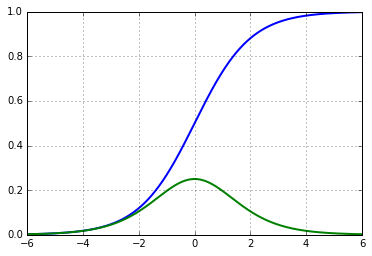

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.plot(testInput, NN.sigmoidPrime(testInput), linewidth=2)
plt.grid(1)
#plt.legend("sigmoid", "sigmoidPrime")

In [341]:
NN = Neural_Network()
#yhat = NN.forward(X)
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
dJdW1

array([[-0.00687853, -0.00499178, -0.00401714],
       [-0.00104284, -0.00075345, -0.00061027]])

In [342]:
cost1

array([ 0.01445205])

In [343]:
dJdW2

array([[-0.02093644],
       [-0.02063204],
       [-0.02109333]])

In [344]:
scalar = 3;
NN.W1 = NN.W1 + scalar * dJdW1
NN.W2 = NN.W2 + scalar * dJdW2
cost2 = NN.costFunction(X,y)
cost2

array([ 0.01942039])

In [345]:
scalar = 3;
NN.W1 = NN.W1 - scalar * dJdW1
NN.W2 = NN.W2 - scalar * dJdW2
cost2 = NN.costFunction(X,y)
cost2

array([ 0.01445205])

In [346]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4
    
    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X,y)
        
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X,y)
        
        #Compute the Numerical Gradient:
        numgrad[p] = (loss2-loss1)/(2*e)
        
        #Return the perturb value for the variable back to 0
        perturb[p] = 0
    
    #Return Params back to initial value
    N.setParams(paramsInitial)
    
    return numgrad
        

In [347]:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [348]:
numgrad

array([-0.00687853, -0.00499178, -0.00401714, -0.00104284, -0.00075345,
       -0.00061027, -0.02093644, -0.02063204, -0.02109333])

In [349]:
grad

array([-0.00687853, -0.00499178, -0.00401714, -0.00104284, -0.00075345,
       -0.00061027, -0.02093644, -0.02063204, -0.02109333])

Calculate a summary value (values of 1e-8 and less are considered good)

In [350]:
norm(grad-numgrad)/norm(grad+numgrad)

1.1491712246185678e-09

In [351]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
          
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad     
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [352]:
trainer = trainer(NN);

In [353]:
trainer.train(X,y)

Optimization terminated successfully.
         Current function value: 0.001227
         Iterations: 54
         Function evaluations: 58
         Gradient evaluations: 58


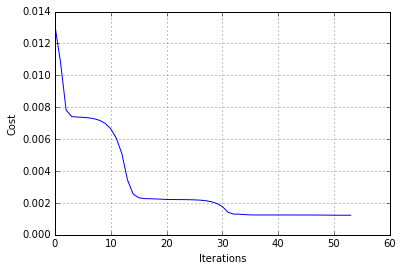

In [354]:
plt.plot(trainer.J)
plt.grid(1)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [355]:
NN.costFunctionPrime(X,y)

(array([[ -2.90325246e-06,  -1.16791801e-06,   5.32950553e-06],
        [ -7.16622752e-07,  -4.42607320e-07,   1.03477900e-06]]),
 array([[ -3.11995240e-06],
        [ -3.13147244e-06],
        [ -1.76203749e-06]]))

In [356]:
X

array([[ 0.3,  0.5],
       [ 0.5,  0.1],
       [ 1. ,  0.2]])

In [357]:
NN.forward(X)

array([[ 0.74999251],
       [ 0.85348888],
       [ 0.89350915]])

In [358]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [359]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [360]:
allOutputs = NN.forward(allInputs)

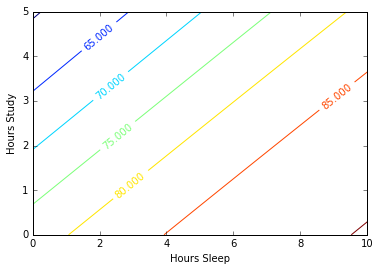

In [361]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

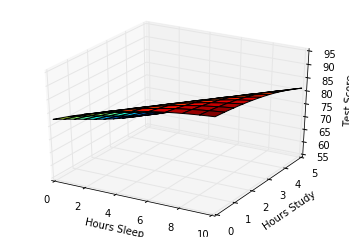

In [363]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')